In [3]:
import numpy as np
import matplotlib.pyplot as plt

# You may change the mhealth_activity module but your algorithm must support the original version
from mhealth_activity import Recording, Trace, Activity, WatchLocation, Path

# For interactive plots, uncomment the following line
# %matplotlib widget

ModuleNotFoundError: No module named 'mhealth_activity'

In [ ]:
import os
import pandas as pd

files = os.listdir('data/train')
list_of_dfs = []
"""
for file in files:
    d = Recording(os.path.join('data/train',file))
    list_of_dfs.append(d)

data = pd.DataFrame(list_of_dfs)
"""

"\nfor file in files:\n    d = Recording(os.path.join('data/train',file))\n    list_of_dfs.append(d)\n\ndata = pd.DataFrame(list_of_dfs)\n"

In [ ]:
#data.to_pickle('train_data.pkl')

In [ ]:
# Load the DataFrame from the pickle file
"""data = pd.read_pickle('train_data.pkl')"""

In [ ]:
#data.columns = ["recording"]

In [ ]:
""" christophs_fussy_mess = []
for sample in data["recording"]:
    try:
        phone_steps = sample.data["phone_steps"]
    except KeyError:
        phone_steps = None
    christophs_fussy_mess.extend([[sample.labels["path_idx"],sample.labels["activities"],
                                   sample.data["longitude"],sample.data["latitude"],
                                   sample.data["speed"],sample.data["altitude"], sample.labels["step_count"], sample.data["phone_steps"]]]) """

In [ ]:
""" christophs_fussy_mess = pd.DataFrame(christophs_fussy_mess) """

NameError: name 'pd' is not defined

In [ ]:
""" christophs_fussy_mess.columns = ["path_idx","activities","longitude","latitude","speed","altitude", "step_count", "phone_steps"] """

In [ ]:
""" christophs_fussy_mess.to_pickle('activitylabelcreation_data.pkl') """

christophs_fussy_mess = pd.read_pickle('activitylabelcreation_data.pkl')

In [ ]:
christophs_fussy_mess

,path_idx,activities,longitude,latitude,speed,altitude,step_count,phone_steps
0,2,[1],"Trace(title='longitude', total_time=584.87, sa...","Trace(title='latitude', total_time=584.87, sam...","Trace(title='speed', total_time=584.87, sample...","Trace(title='altitude', total_time=584.87, sam...",NaN,"Trace(title='phone_steps', total_time=584.87, ..."
1,0,"[1, 2]","Trace(title='longitude', total_time=519.01, sa...","Trace(title='latitude', total_time=519.01, sam...","Trace(title='speed', total_time=519.01, sample...","Trace(title='altitude', total_time=519.01, sam...",NaN,"Trace(title='phone_steps', total_time=519.01, ..."
2,0,"[0, 1, 2]","Trace(title='longitude', total_time=594.12, sa...","Trace(title='latitude', total_time=594.12, sam...","Trace(title='speed', total_time=594.12, sample...","Trace(title='altitude', total_time=594.12, sam...",NaN,None
3,2,[1],"Trace(title='longitude', total_time=519.63, sa...","Trace(title='latitude', total_time=519.63, sam...","Trace(title='speed', total_time=519.63, sample...","Trace(title='altitude', total_time=519.63, sam...",NaN,None
4,1,[1],"Trace(title='longitude', total_time=625.44, sa...","Trace(title='latitude', total_time=625.44, sam...","Trace(title='speed', total_time=625.44, sample...","Trace(title='altitude', total_time=625.44, sam...",NaN,None
...,...,...,...,...,...,...,...,...
391,3,"[0, 1, 2]","Trace(title='longitude', total_time=325.70, sa...","Trace(title='latitude', total_time=325.70, sam...","Trace(title='speed', total_time=325.70, sample...","Trace(title='altitude', total_time=325.70, sam...",NaN,"Trace(title='phone_steps', total_time=325.70, ..."
392,4,[1],"Trace(title='longitude', total_time=619.13, sa...","Trace(title='latitude', total_time=619.13, sam...","Trace(title='speed', total_time=619.13, sample...","Trace(title='altitude', total_time=619.13, sam...",NaN,"Trace(title='phone_steps', total_time=619.13, ..."
393,2,[1],"Trace(title='longitude', total_time=747.65, sa...","Trace(title='latitude', total_time=747.65, sam...","Trace(title='speed', total_time=747.65, sample...","Trace(title='altitude', total_time=747.65, sam...",NaN,None
394,3,[1],"Trace(title='longitude', total_time=456.01, sa...","Trace(title='latitude', total_time=456.01, sam...","Trace(title='speed', total_time=456.01, sample...","Trace(title='altitude', total_time=456.01, sam...",NaN,None


In [ ]:
phone_steps = christophs_fussy_mess['phone_steps'][0]

print(" Time           x-Steps")

for t,x in list(zip(phone_steps.timestamps, phone_steps.values))[::8]: #ich extrahiere nur jedes 8te, das sind circa 3 timestampts für jede 2 sekunden; eventuell ist das aber noch immer viel zu viel weil es immer noch replikas gibt wenn es um die 
    print(f"{t: .3f}s \t{x:.5f} steps?")


 Time           x-Steps
 0.000s 	0.00000 steps?
 0.639s 	0.00000 steps?
 1.278s 	3.00000 steps?
 1.917s 	3.00000 steps?
 2.556s 	3.00000 steps?
 3.196s 	3.00000 steps?
 3.835s 	7.00000 steps?
 4.474s 	7.00000 steps?
 5.113s 	7.00000 steps?
 5.752s 	7.00000 steps?
 6.391s 	12.00000 steps?
 7.030s 	12.00000 steps?
 7.669s 	12.00000 steps?
 8.309s 	12.00000 steps?
 8.948s 	17.00000 steps?
 9.587s 	17.00000 steps?
 10.226s 	17.00000 steps?
 10.865s 	17.00000 steps?
 11.504s 	20.00000 steps?
 12.143s 	20.00000 steps?
 12.782s 	20.00000 steps?
 13.422s 	20.00000 steps?
 14.061s 	26.00000 steps?
 14.700s 	26.00000 steps?
 15.339s 	26.00000 steps?
 15.978s 	26.00000 steps?
 16.617s 	31.00000 steps?
 17.256s 	31.00000 steps?
 17.895s 	31.00000 steps?
 18.534s 	31.00000 steps?
 19.174s 	36.00000 steps?
 19.813s 	36.00000 steps?
 20.452s 	36.00000 steps?
 21.091s 	36.00000 steps?
 21.730s 	41.00000 steps?
 22.369s 	41.00000 steps?
 23.008s 	41.00000 steps?
 23.647s 	41.00000 steps?
 24.287s 	46.0

In [ ]:
""" phone_steps = christophs_fussy_mess['phone_steps'][0]

print(" Time           Steps")

# Initialize a dictionary to store steps for each second
steps_per_second = {}

# Iterate over the timestamps and values
for t, x in zip(phone_steps.timestamps, phone_steps.values):
    # Get the second part of the timestamp as the key
    second = int(t)
    #print("second:", second, "real: ", t)
    # If the second is not in the dictionary, initialize it with an empty list
    if second not in steps_per_second:
        steps_per_second[second] = []
    # Add the steps to the list for the current second
    steps_per_second[second].append(x)

# Calculate the average steps for each second
for second, steps in steps_per_second.items():
    average_steps = sum(steps) / len(steps)
    print(f"{second}s \t{average_steps:.5f} steps") """
#das pooled alles in eine sekunde jeweils, eine überlegung wert

' phone_steps = christophs_fussy_mess[\'phone_steps\'][0]\n\nprint(" Time           Steps")\n\n# Initialize a dictionary to store steps for each second\nsteps_per_second = {}\n\n# Iterate over the timestamps and values\nfor t, x in zip(phone_steps.timestamps, phone_steps.values):\n    # Get the second part of the timestamp as the key\n    second = int(t)\n    #print("second:", second, "real: ", t)\n    # If the second is not in the dictionary, initialize it with an empty list\n    if second not in steps_per_second:\n        steps_per_second[second] = []\n    # Add the steps to the list for the current second\n    steps_per_second[second].append(x)\n\n# Calculate the average steps for each second\nfor second, steps in steps_per_second.items():\n    average_steps = sum(steps) / len(steps)\n    print(f"{second}s \t{average_steps:.5f} steps") '

In [ ]:
git ist ein stück scheisse

In [ ]:
step_attributes = dir(phone_steps)

In [ ]:
i = 0
list_singles = []
for sample in christophs_fussy_mess["activities"]:
    if(check_only_number(sample,1)):
        list_singles.append(i)
    i = i + 1

NameError: name 'christophs_fussy_mess' is not defined

In [ ]:
list_singles

[]

In [ ]:
i = 0
list_singles = []
for sample in christophs_fussy_mess["activities"]:
    if(check_only_number(sample,3)):
        list_singles.append(i)
    i = i + 1

NameError: name 'check_only_number' is not defined

In [ ]:
list_singles

[27, 46, 82, 114, 154, 155, 179, 184, 238, 287, 288, 298, 315, 329, 361]

In [ ]:
data

c:\Users\oliwi\Documents\MHA\mhavenv\Lib\site-packages\scipy\interpolate\_interpolate.py:701: RuntimeWarning: invalid value encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]


,0
0,"Recording(filename='train_trace_000.pkl', labe..."
1,"Recording(filename='train_trace_001.pkl', labe..."
2,"Recording(filename='train_trace_002.pkl', labe..."
3,"Recording(filename='train_trace_003.pkl', labe..."
4,"Recording(filename='train_trace_004.pkl', labe..."
...,...
391,"Recording(filename='train_trace_391.pkl', labe..."
392,"Recording(filename='train_trace_392.pkl', labe..."
393,"Recording(filename='train_trace_393.pkl', labe..."
394,"Recording(filename='train_trace_394.pkl', labe..."


In [ ]:
data["recording"][2]

KeyError: 'recording'

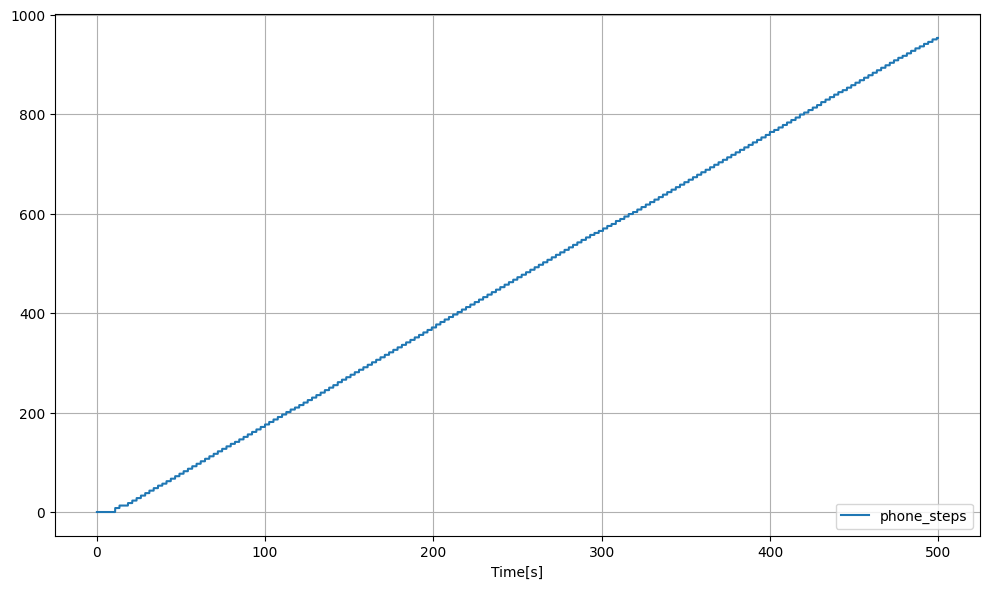

In [ ]:
data["recording"][5].plot(["phone_steps"])

In [ ]:
# Define the keys you want to fill with None if they are missing
keys_to_fill = ["phone_steps"]

# Use a dictionary comprehension to fill missing keys with None
#data["recording"] = {key: data["recording"].get(key, None) for key in keys_to_fill}

print(data["recording"])

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
      ... 
391    NaN
392    NaN
393    NaN
394    NaN
395    NaN
Name: recording, Length: 396, dtype: object
